# Change in the rate of instructional staff announcements before and after COVID

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args

sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring


In [2]:
announce = pd.read_csv(args.discussion_topics, sep='\t', header=0)
announce = announce.loc[(announce['workflow_state']=='active')&(announce['discussion_topic_type']=='Announcement')]
f = open('../user_id_groups.pkl', 'rb')
users = pickle.load(f)
teacher_ta = users['teacher'] + users['ta']
announce = announce.loc[announce['user_id'].isin(teacher_ta)]
#print(announce)

In [3]:
def create_group(start_date, end_date):
    announce['created_at'] = pd.to_datetime(announce['created_at'], format='%Y-%m-%d %H:%M:%S.%f')
    create = announce.loc[(announce['created_at']>=start_date)&(announce['created_at']<=end_date), ['assignment_id', 'created_at']].drop_duplicates()
    create['created_at'] = create['created_at'].apply(lambda x: x.date())
    create_group = create.groupby('created_at').size().reset_index()
    return create_group

create_group_20 = create_group(start_date_20, end_date_20)
create_group_19 = create_group(start_date_19, end_date_19)
create_group_18 = create_group(start_date_18, end_date_18)
create_group_17 = create_group(start_date_17, end_date_17)

create_group_20.set_index('created_at', inplace=True)
create_group_19['created_at'] = create_group_19['created_at'].apply(lambda x: x.replace(year=2020))
create_group_19.set_index('created_at', inplace=True)
create_group_18['created_at'] = create_group_18['created_at'].apply(lambda x: x.replace(year=2020))
create_group_18.set_index('created_at', inplace=True)
create_group_17['created_at'] = create_group_17['created_at'].apply(lambda x: x.replace(year=2020))
create_group_17.set_index('created_at', inplace=True)

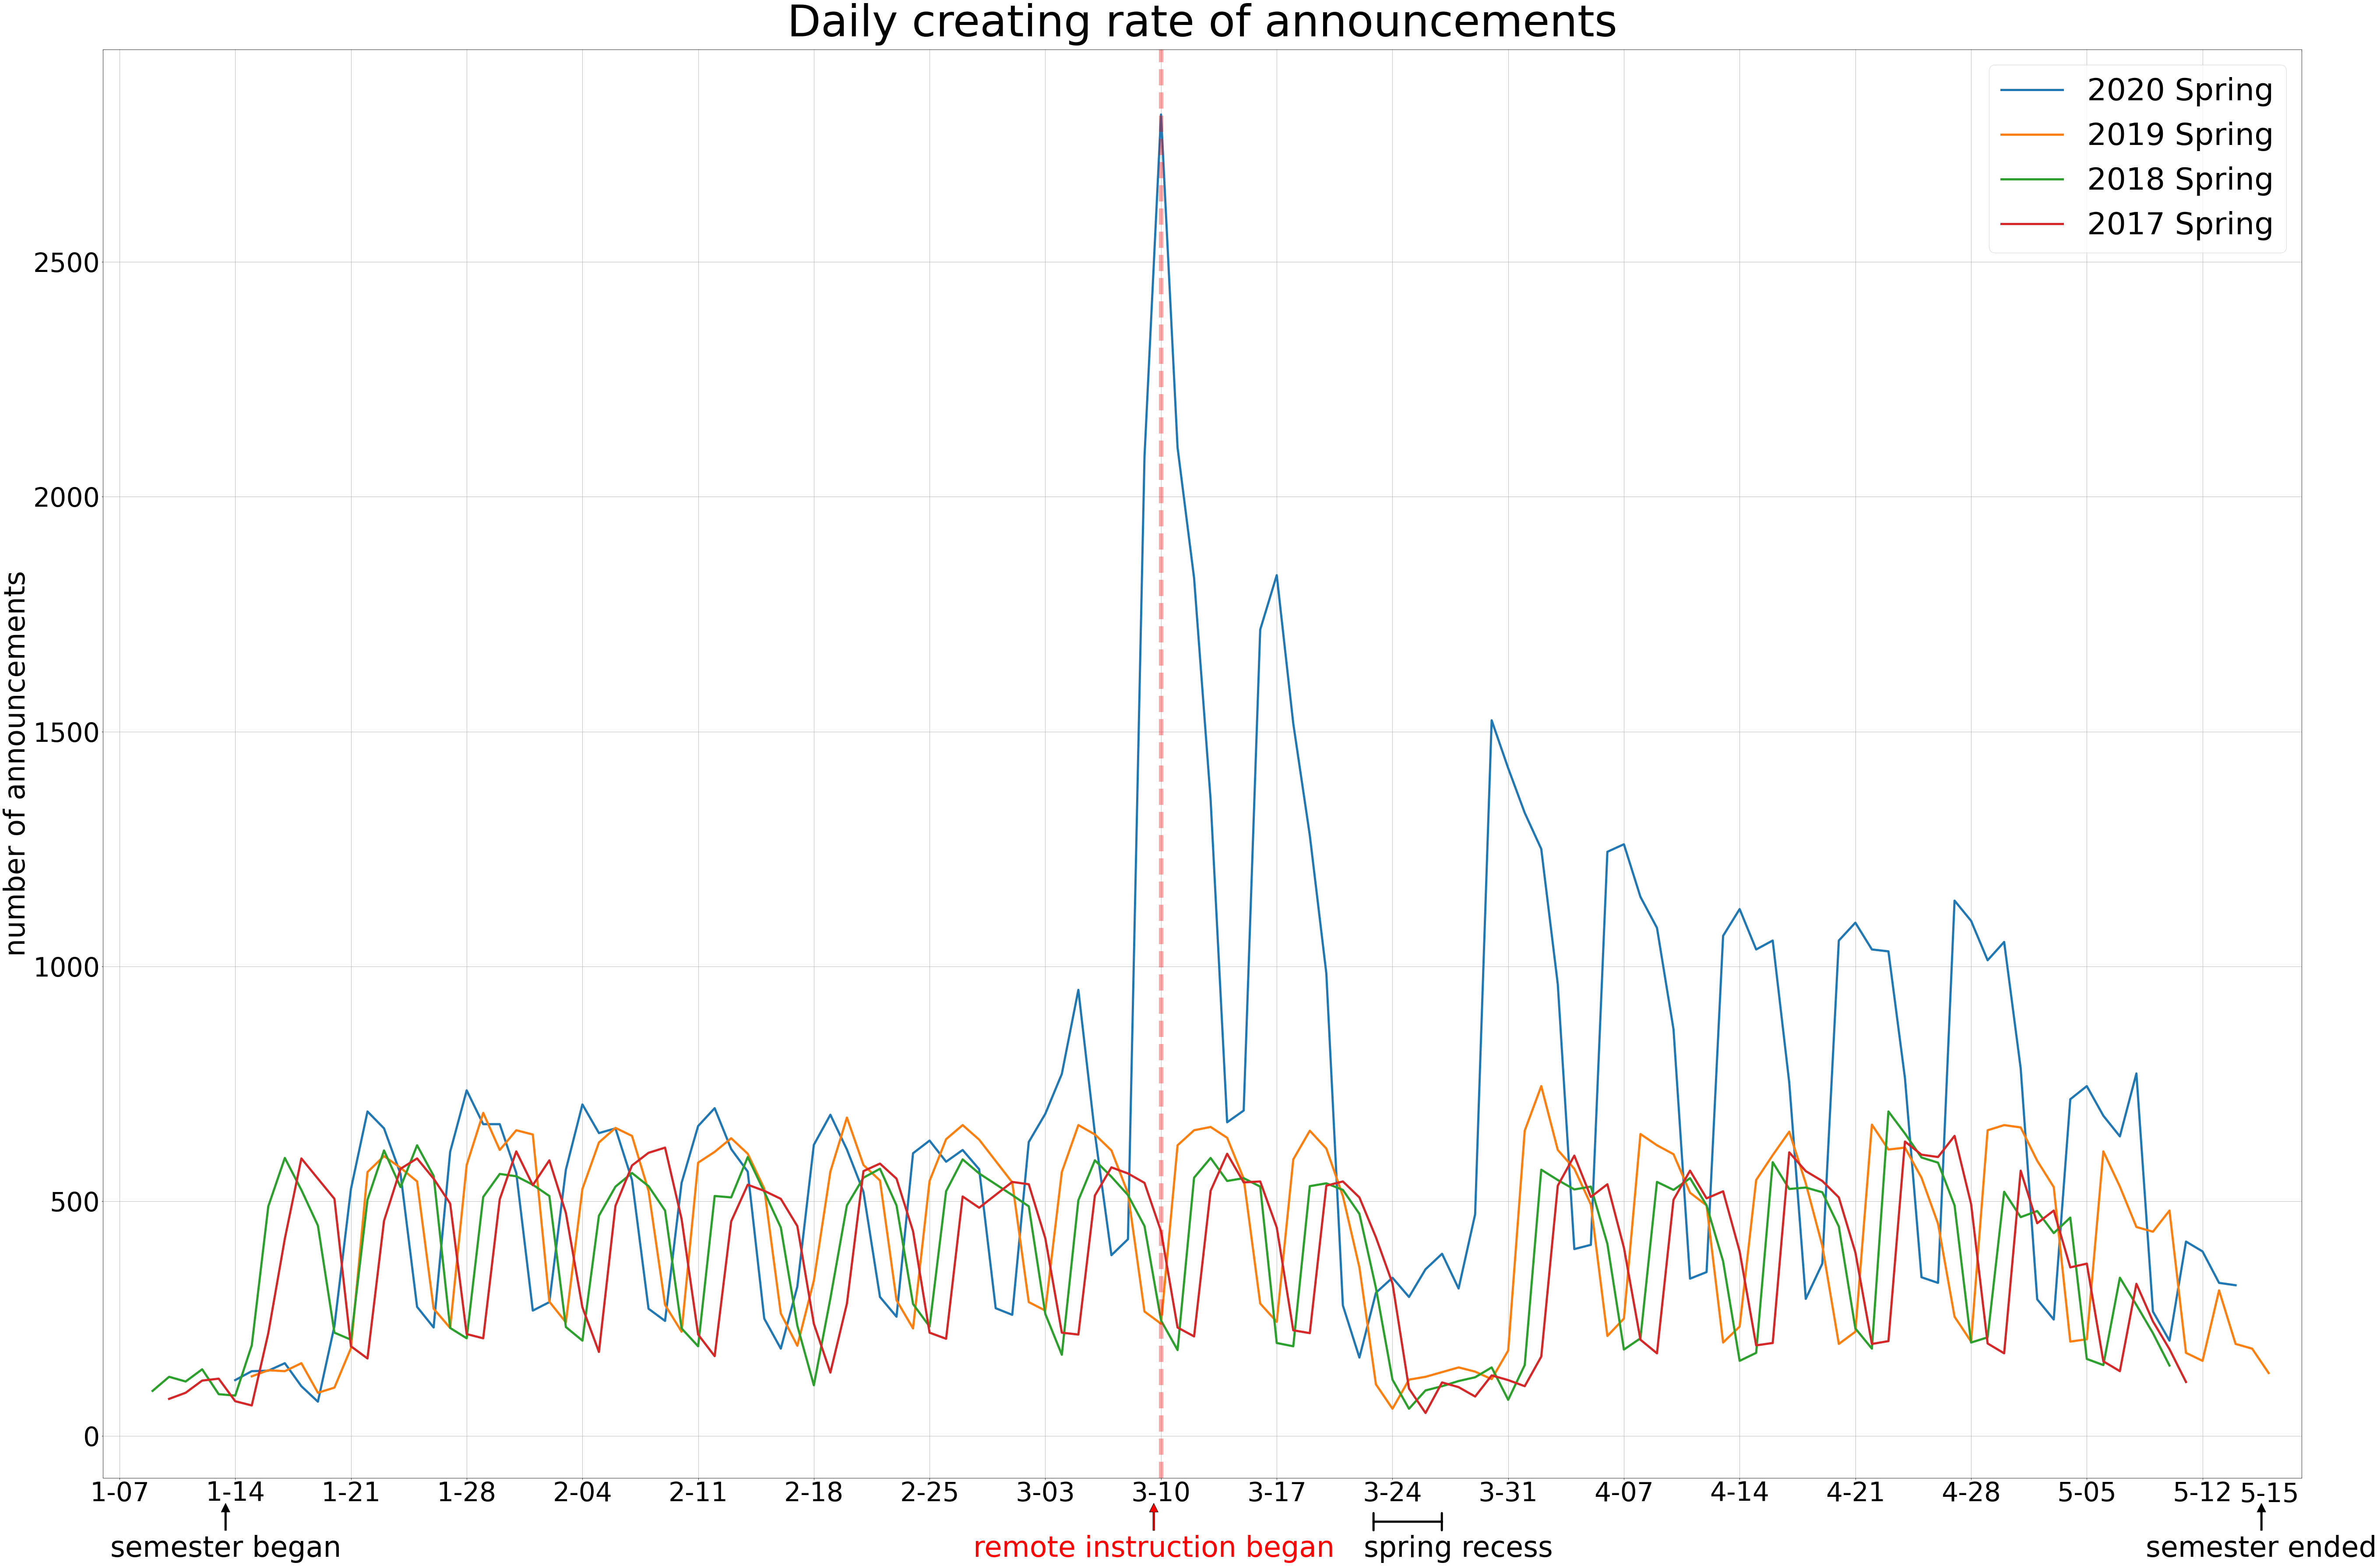

In [5]:
# set x-axis ticks
fig,ax = plt.subplots()
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(create_group_20, linewidth=5.0, label='2020 Spring')
plt.plot(create_group_19, linewidth=5.0, label='2019 Spring')
plt.plot(create_group_18, linewidth=5.0, label='2018 Spring')
plt.plot(create_group_17, linewidth=5.0, label='2017 Spring')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily creating rate of announcements', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of announcements', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

In [6]:
def update_group(start_date, end_date):
    announce['updated_at'] = pd.to_datetime(announce['updated_at'], format='%Y-%m-%d %H:%M:%S.%f')
    create = announce.loc[(announce['updated_at']>=start_date)&(announce['updated_at']<=end_date), ['assignment_id', 'updated_at']].drop_duplicates()
    create['updated_at'] = create['updated_at'].apply(lambda x: x.date())
    create_group = create.groupby('updated_at').size().reset_index()
    return create_group

update_group_20 = update_group(start_date_20, end_date_20)
update_group_19 = update_group(start_date_19, end_date_19)
update_group_18 = update_group(start_date_18, end_date_18)
update_group_17 = update_group(start_date_17, end_date_17)

update_group_20.set_index('updated_at', inplace=True)
update_group_19['updated_at'] = update_group_19['updated_at'].apply(lambda x: x.replace(year=2020))
update_group_19.set_index('updated_at', inplace=True)
update_group_18['updated_at'] = update_group_18['updated_at'].apply(lambda x: x.replace(year=2020))
update_group_18.set_index('updated_at', inplace=True)
update_group_17['updated_at'] = update_group_17['updated_at'].apply(lambda x: x.replace(year=2020))
update_group_17.set_index('updated_at', inplace=True)

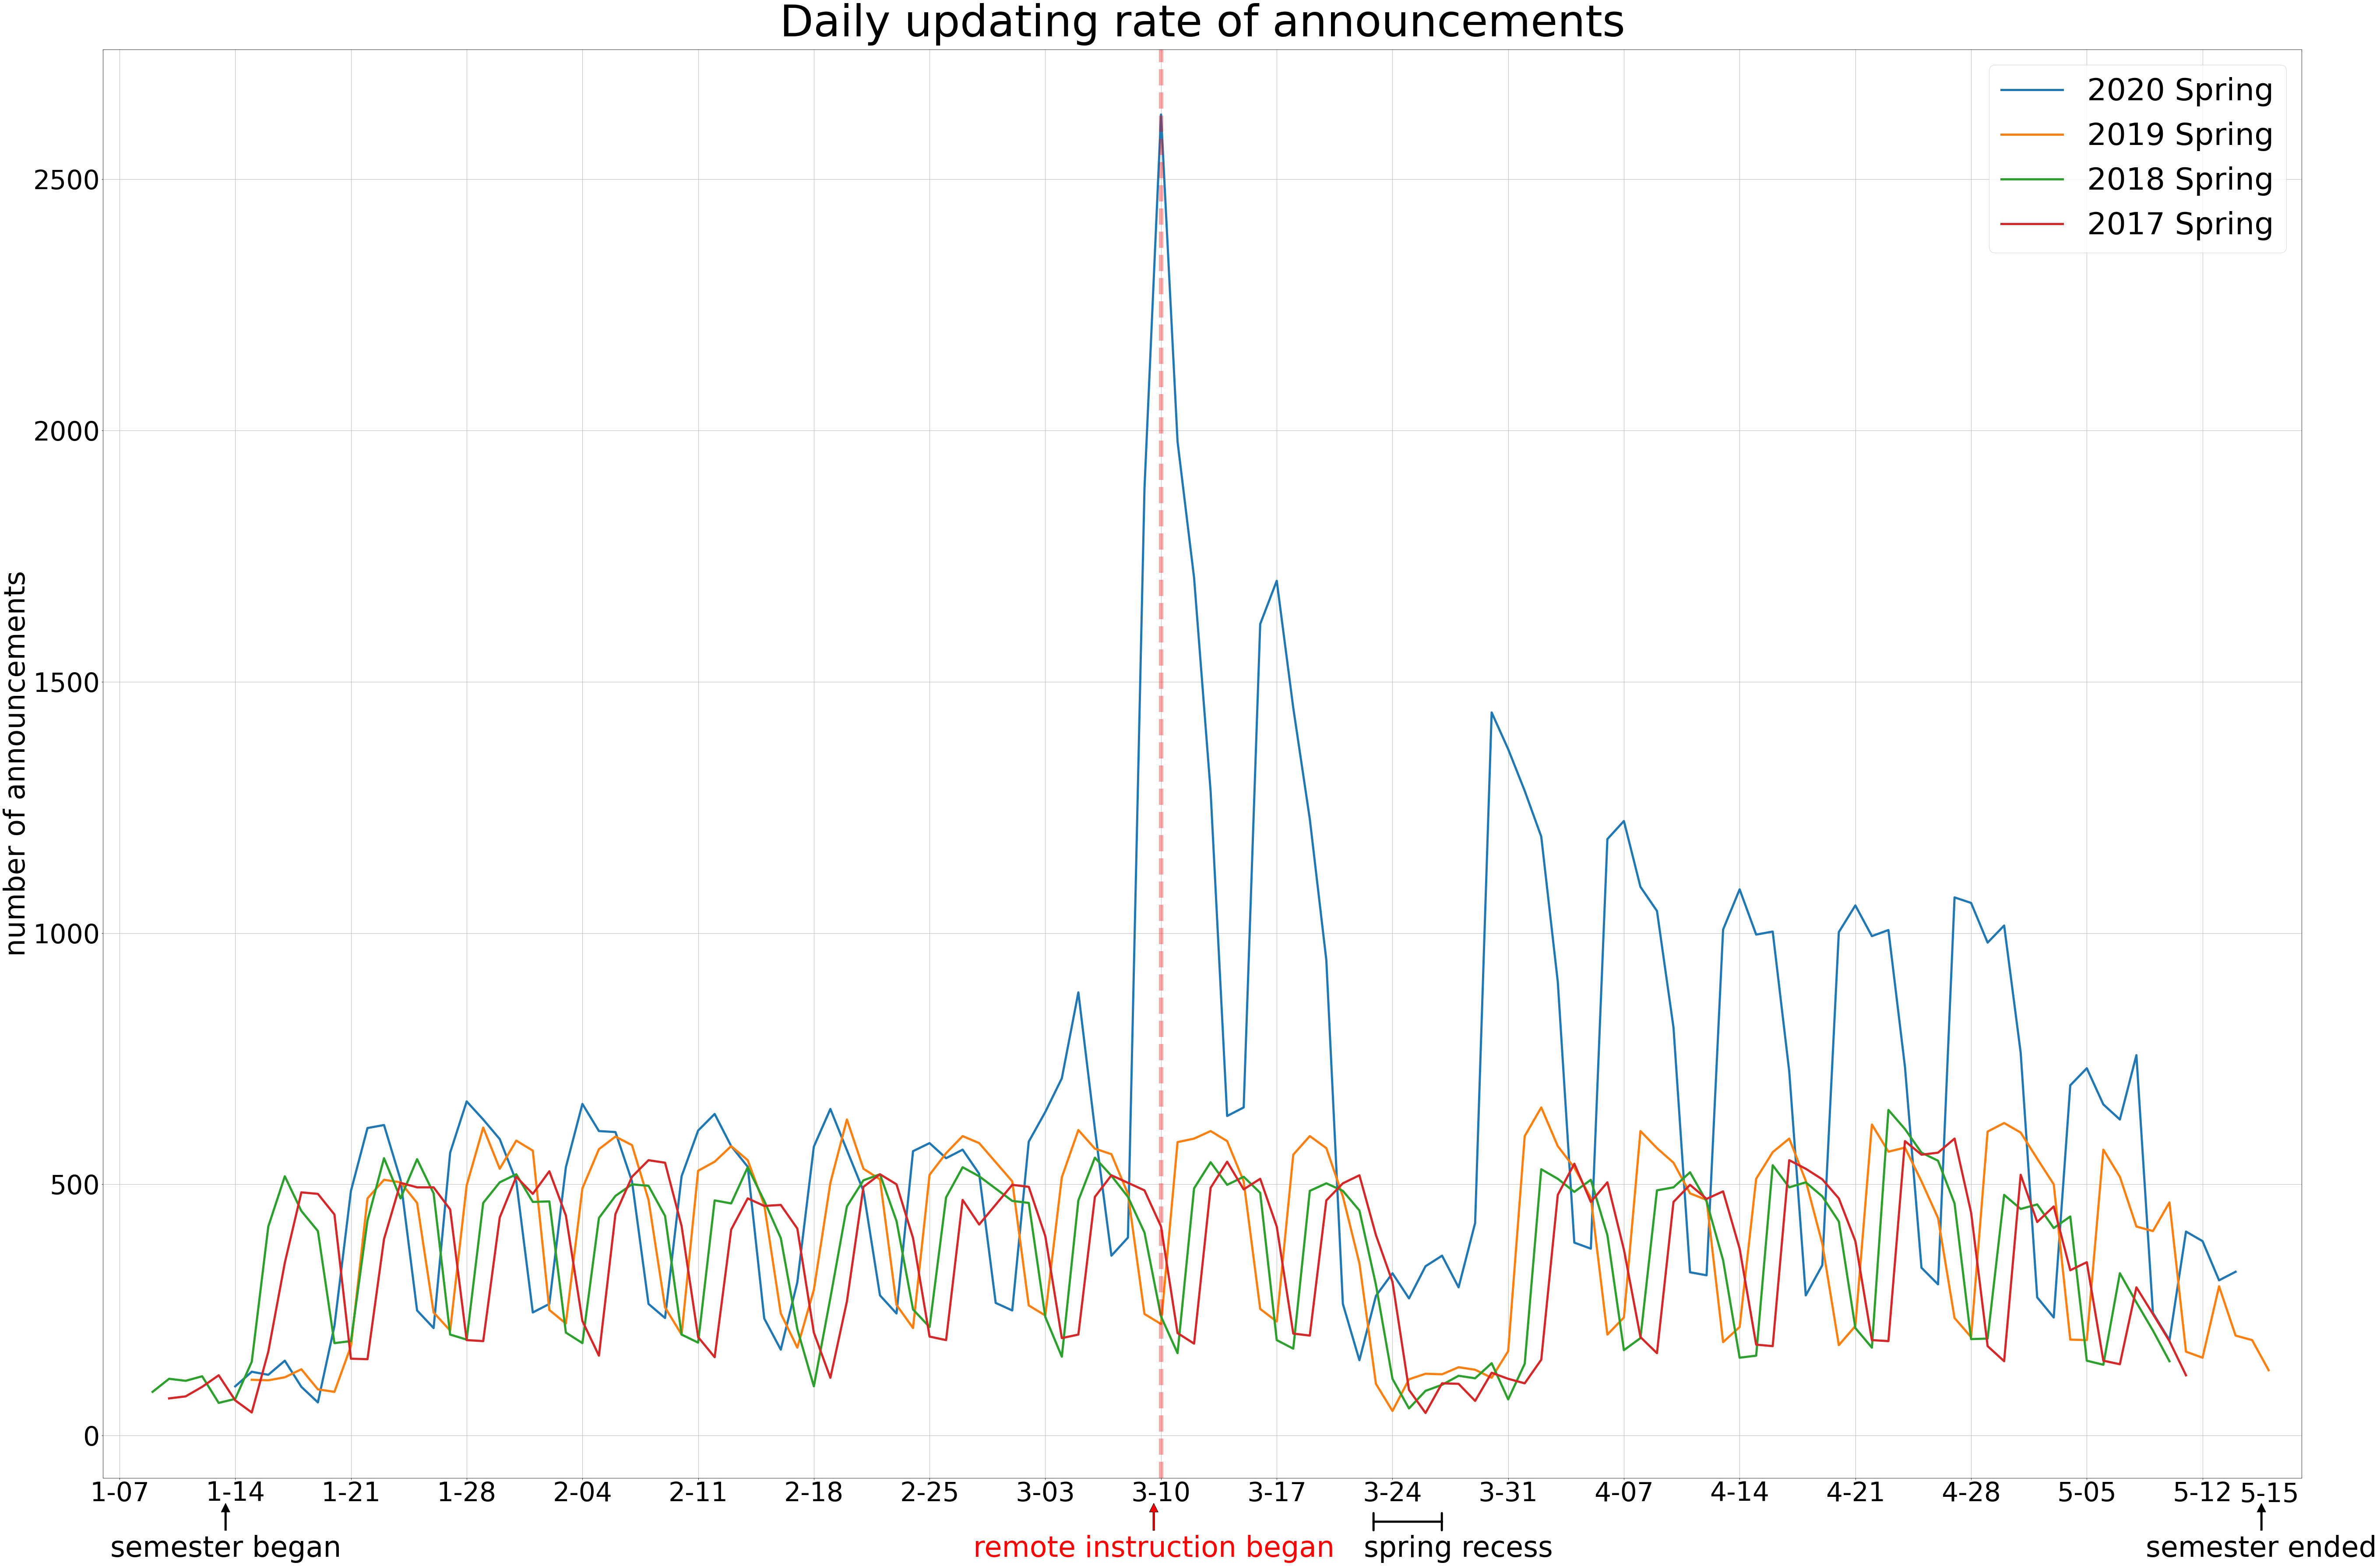

In [8]:
# set x-axis ticks
fig,ax = plt.subplots()
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(update_group_20, linewidth=5.0, label='2020 Spring')
plt.plot(update_group_19, linewidth=5.0, label='2019 Spring')
plt.plot(update_group_18, linewidth=5.0, label='2018 Spring')
plt.plot(update_group_17, linewidth=5.0, label='2017 Spring')

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily updating rate of announcements', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of announcements', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

In [9]:
def post_group(start_date, end_date):
    announce['posted_at'] = pd.to_datetime(announce['posted_at'], format='%Y-%m-%d %H:%M:%S.%f')
    create = announce.loc[(announce['posted_at']>=start_date)&(announce['posted_at']<=end_date), ['assignment_id', 'posted_at']].drop_duplicates()
    create['posted_at'] = create['posted_at'].apply(lambda x: x.date())
    create_group = create.groupby('posted_at').size().reset_index()
    return create_group

post_group_20 = post_group(start_date_20, end_date_20)
post_group_19 = post_group(start_date_19, end_date_19)
post_group_18 = post_group(start_date_18, end_date_18)
post_group_17 = post_group(start_date_17, end_date_17)

post_group_20.set_index('posted_at', inplace=True)
post_group_19['posted_at'] = post_group_19['posted_at'].apply(lambda x: x.replace(year=2020))
post_group_19.set_index('posted_at', inplace=True)
post_group_18['posted_at'] = post_group_18['posted_at'].apply(lambda x: x.replace(year=2020))
post_group_18.set_index('posted_at', inplace=True)
post_group_17['posted_at'] = post_group_17['posted_at'].apply(lambda x: x.replace(year=2020))
post_group_17.set_index('posted_at', inplace=True)

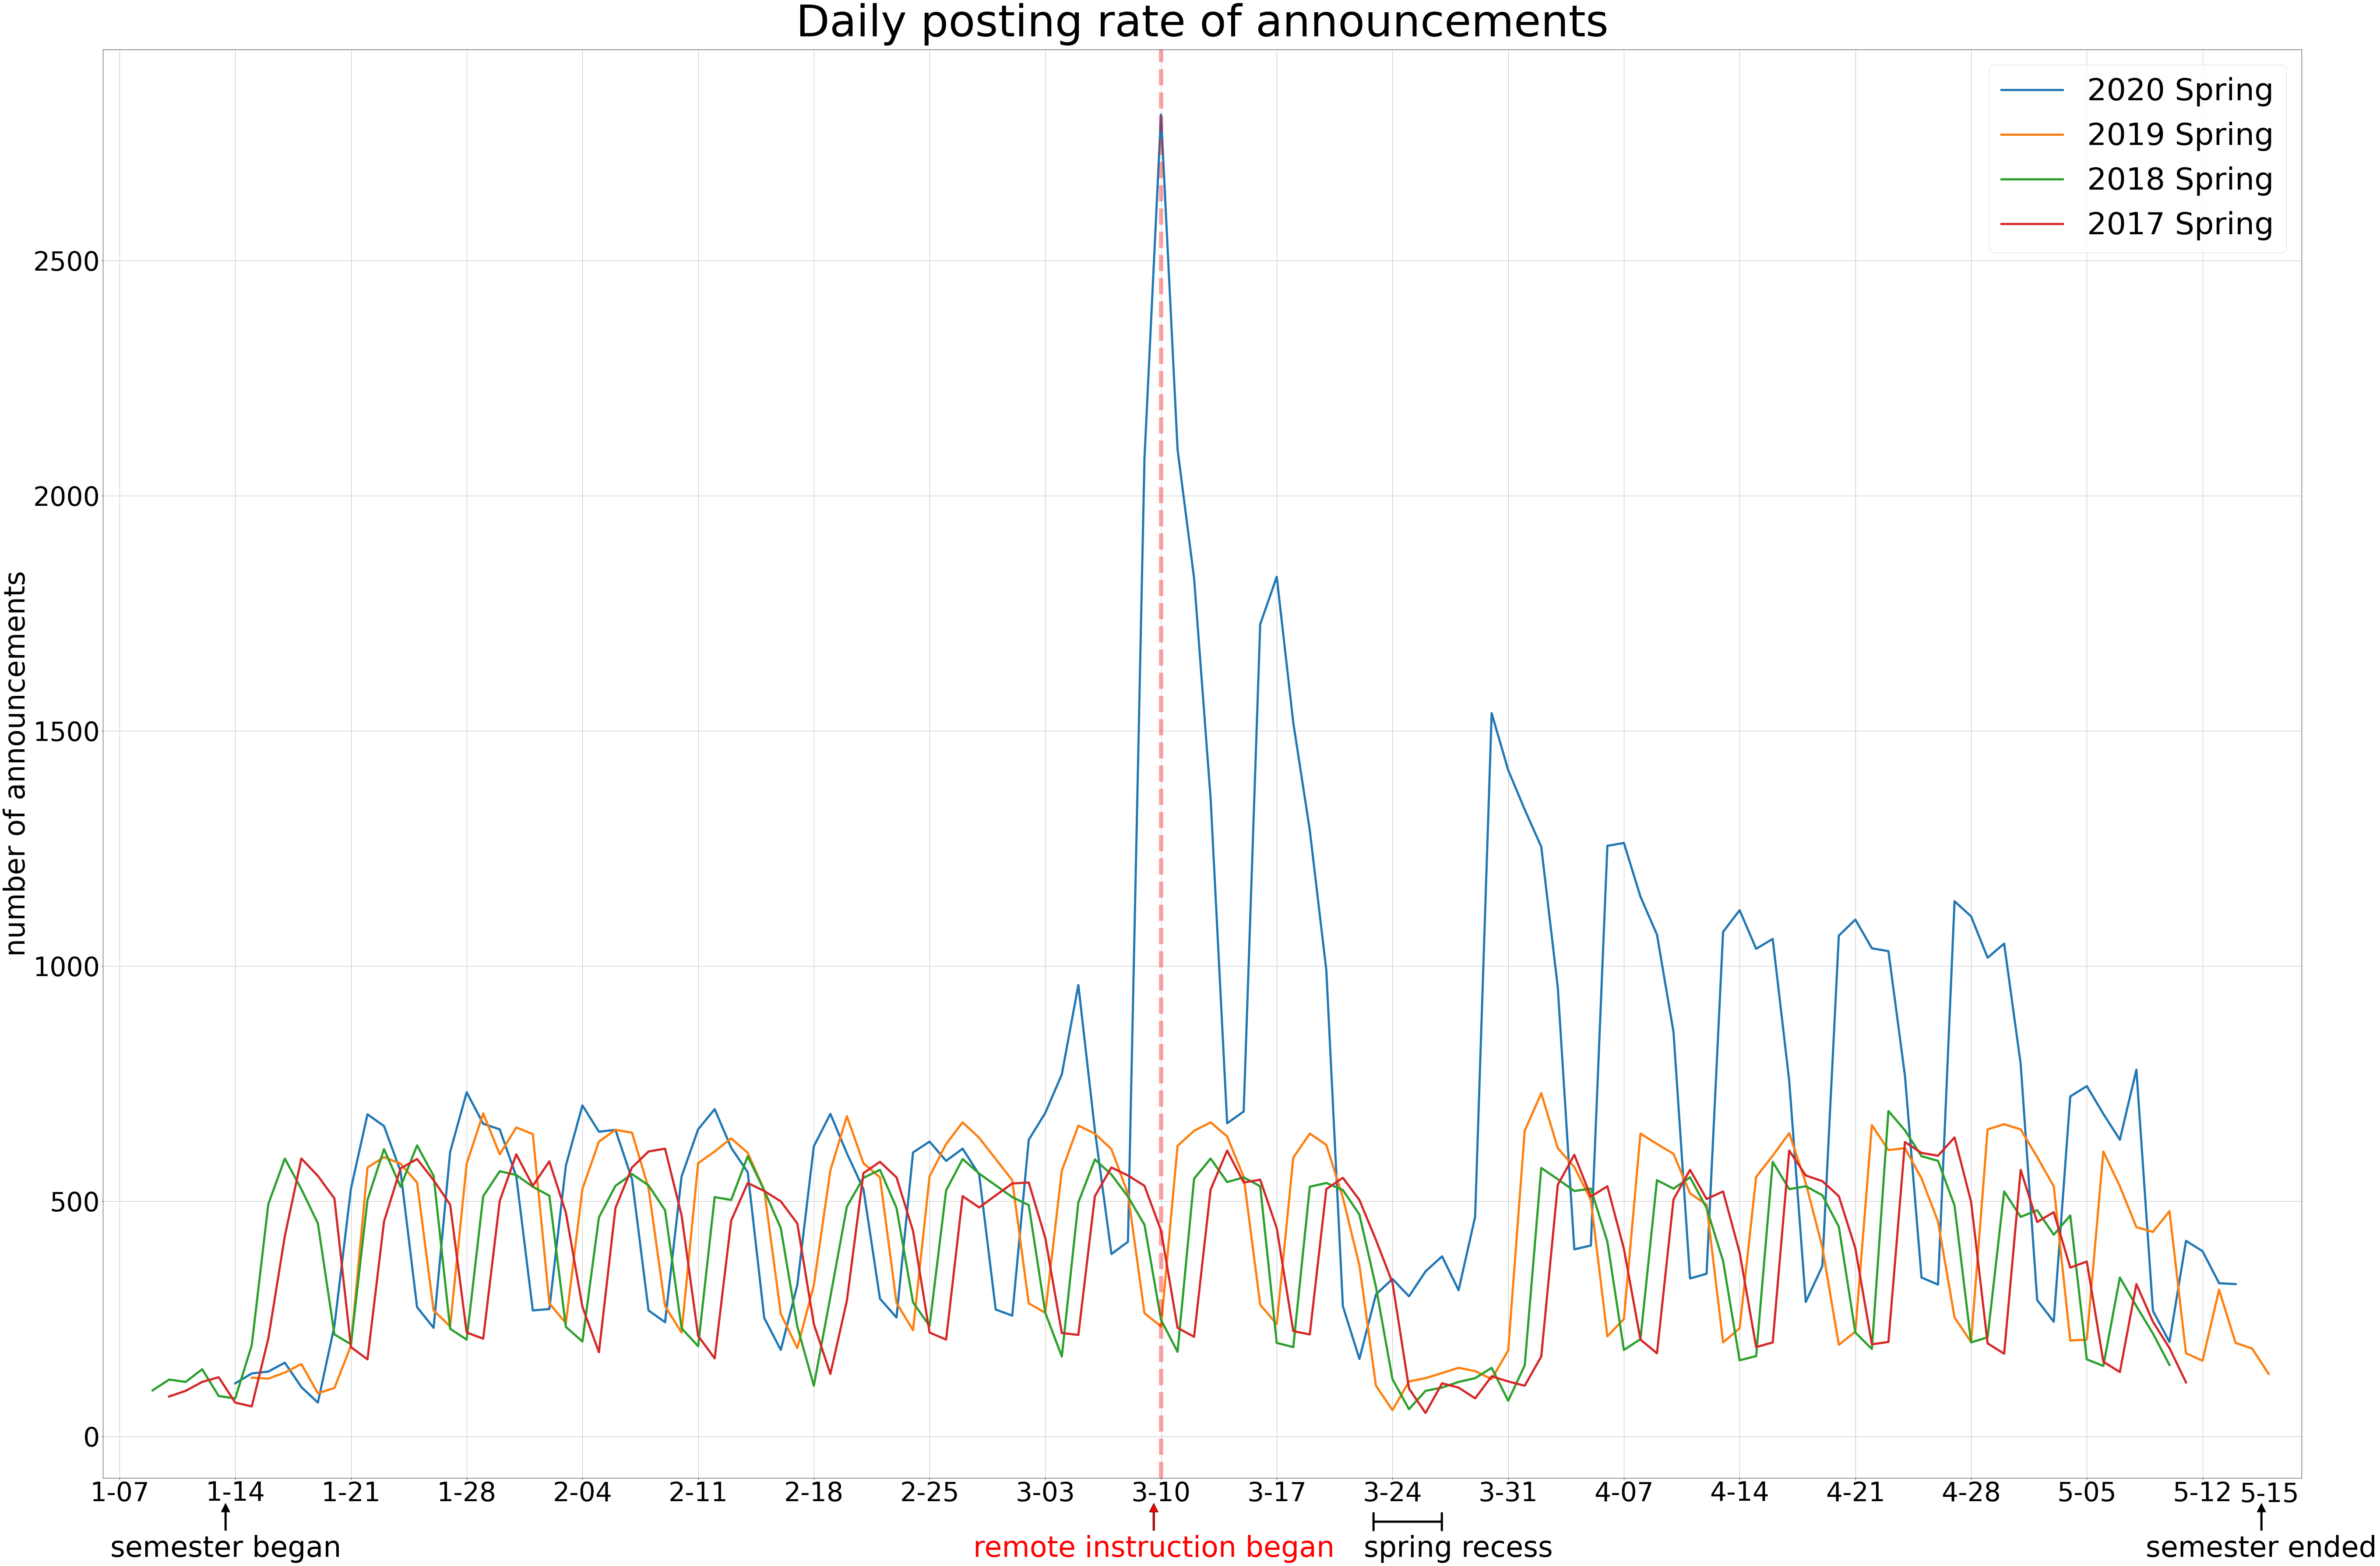

In [11]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(post_group_20, linewidth=5.0, label='2020 Spring')
plt.plot(post_group_19, linewidth=5.0, label='2019 Spring')
plt.plot(post_group_18, linewidth=5.0, label='2018 Spring')
plt.plot(post_group_17, linewidth=5.0, label='2017 Spring')

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily posting rate of announcements', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of announcements', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

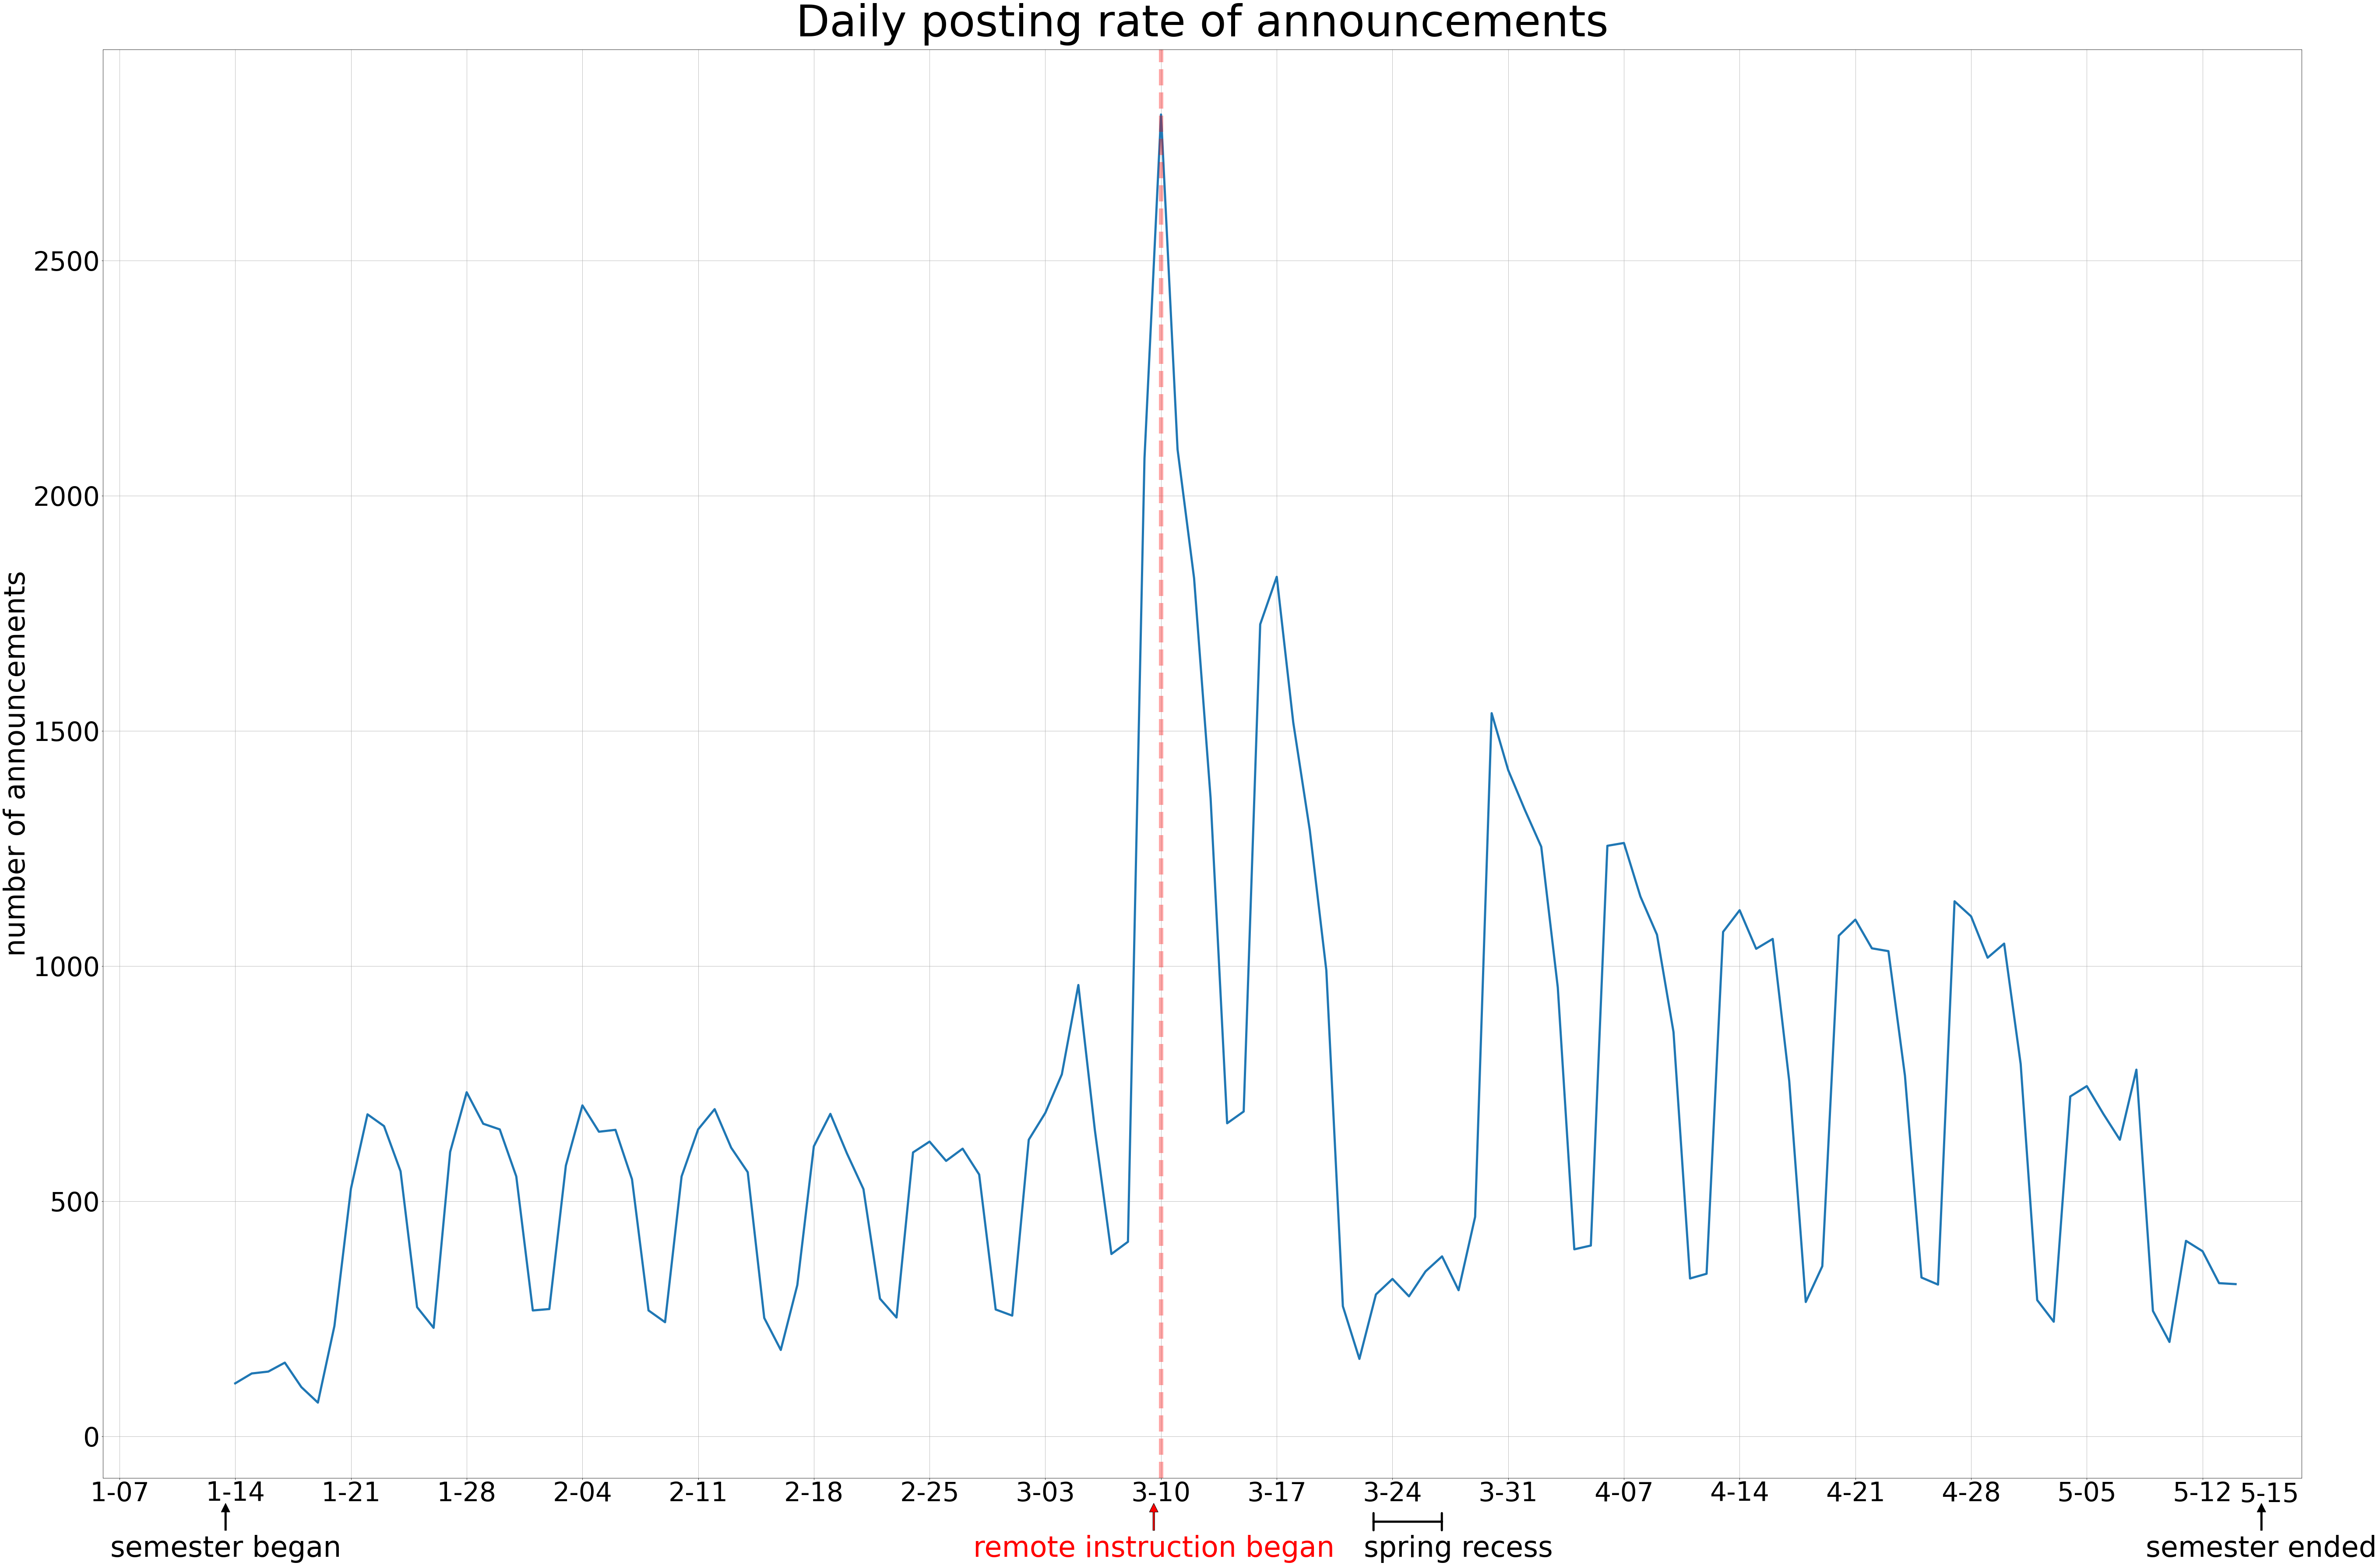

In [12]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(post_group_20, linewidth=5.0, label='2020 Spring')
plt.plot(post_group_19, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(post_group_18, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(post_group_17, linewidth=5.0, label='2017 Spring', alpha=0)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Daily posting rate of announcements', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of announcements', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()